from: https://towardsdatascience.com/machine-learning-autoencoders-712337a07c71

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [27]:
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [28]:

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

11493376/11490434 [==============================] - 2s 0us/step


In [29]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [30]:
X_train = np.round(X_train, 0)
X_test = np.round(X_test, 0)

In [31]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [32]:
print(X_train.shape)

(60000, 784)


In [33]:
inputs = tf.keras.layers.Input(784)
encoded_1 = tf.keras.layers.Dense(128)(inputs)
encoded = tf.keras.layers.Dense(64, activation='relu')(encoded_1)
decoded_1 = tf.keras.layers.Dense(128)(encoded)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(decoded_1)

auto_encoder = tf.keras.Model(inputs, decoded)
auto_encoder.compile(loss='binary_crossentropy'
                     , optimizer='adam'
                     , metrics = ['accuracy'])

auto_encoder.summary()
tf.keras.utils.plot_model(auto_encoder
                          , show_shapes=True
                          , to_file='autoenc.png'
                          , dpi = 200)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               101136    
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [37]:
encoder = tf.keras.Model(inputs, encoded)
encoder.summary()
tf.keras.utils.plot_model(encoder
                         , show_shapes=True
                         , to_file='enc.png'
                         , dpi=200)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
Total params: 108,736
Trainable params: 108,736
Non-trainable params: 0
_________________________________________________________________
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [35]:
auto_encoder.fit(X_train
                 , X_train
                 , epochs = 10
                 , batch_size=256
                 , shuffle=True)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1944 - accuracy: 0.9124
Epoch 2/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0957 - accuracy: 0.9599
Epoch 3/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0742 - accuracy: 0.9697
Epoch 4/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0633 - accuracy: 0.9746
Epoch 5/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0557 - accuracy: 0.9779
Epoch 6/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0504 - accuracy: 0.9802
Epoch 7/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0465 - accuracy: 0.9819
Epoch 8/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0435 - accuracy: 0.9832
Epoch 9/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0412 - accuracy: 0.9841
Epoch 10/10
60

In [38]:
predicted_2dim = encoder.predict(X_test)
predicted_original = auto_encoder.predict(X_test)

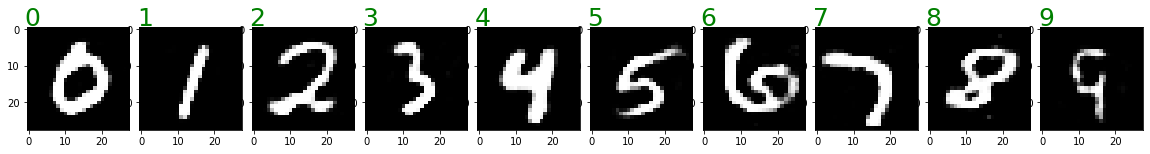

In [41]:
shown = {}
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=1, wspace=0.1)
i = 0

for data, y in zip(predicted_original, y_test):
    if y not in shown and y==len(shown):
        i+=1
        ax = fig.add_subplot(1, 10, i)
        ax.text(1, -1, str(y)
               , fontsize=25
               , ha='center'
               , c = 'g')
        ax.imshow(np.array(data).reshape(28, 28), cmap='gray')

        shown[y] = True
    if len(shown) == 10:
        break